# Final Project Submission

Please fill out:
* Student name: **Simranjit Nepaul / Christine Egan / Amarnath Kuppannan**
* Student pace: **Part Time **
* Scheduled project review date/time:  **TBD**
* Instructor name: **Amber Yandow**
* Blog post URL: 
* Video of 5-min Non-Technical Presentation:

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

> Explain the point of our project and what question we are trying to answer with your modeling.

# OBTAIN

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
%matplotlib inline
import warnings
import seaborn as sns
import scipy.stats as stats

# To increase the max coloumns displayed
pd.set_option('display.max_columns',99) 

In [2]:
# Following library might not be preinstalled in you enviorment.
# To install please type "conda install ipywidgets" in your terminal or bash window

from ipywidgets import interact # Required to analyze the graphs in Scrub and Explore sections

In [3]:
# We import the data that was cleaned in a different notebook. 
# Please refer to ........
x = pd.read_csv('https://raw.githubusercontent.com/snepaul179/Real_EstateModel-onl01-dtsc-pt-052620/master/kc_re_data.csv')
data = x.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21534 entries, 0 to 21533
Data columns (total 24 columns):
id               21534 non-null int64
price            21534 non-null int64
date             21534 non-null object
yr_sold          21534 non-null int64
yr_built         21534 non-null int64
age_at_sale      21534 non-null int64
reno             21534 non-null int64
yr_renovated     21534 non-null int64
condition        21534 non-null int64
grade            21534 non-null int64
view             21534 non-null int64
floors           21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
basement         21534 non-null int64
sqft_lot         21534 non-null int64
sqft_living      21534 non-null int64
sqft_basement    21534 non-null int64
sqft_above       21534 non-null int64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
zipcode 

# SCRUB

> Scrub Checklist
- [X] Linearity with our Target column: Scatter Mattrix
- [X] No Null values: missingno lib
- [X] Data ~Normality: Histogram 
- [ ] Normalizing: in Explore section

> Data Obtained was already srubbed for outliers, Null Values. 
And some feature engineering was also done:
    - "age_at_sale": Calculated from sale year and built year.
    - "reno": Categorical to label if the house was renovated since bought.

In [6]:
data.describe()

,id,price,yr_sold,yr_built,age_at_sale,reno,yr_renovated,condition,grade,view,floors,bedrooms,bathrooms,basement,sqft_lot,sqft_living,sqft_basement,sqft_above,sqft_living15,sqft_lot15,lat,long,zipcode
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,2014.322560,1971.002275,43.320284,0.034504,68.866722,3.409724,7.657425,0.233863,1.494126,3.373038,2.115712,0.384694,1.509060e+04,2079.827854,285.244311,1788.557537,1986.299944,12751.079502,47.560180,-122.213948,98077.939352
std,2.876779e+09,3.660596e+05,0.467467,29.376044,29.378039,0.182523,364.314552,0.650654,1.172643,0.765686,0.539806,0.926410,0.768602,0.486534,4.138021e+04,917.446520,439.334095,827.745641,685.121001,27255.483308,0.138528,0.140735,53.506639
min,1.000102e+06,7.800000e+04,2014.000000,1900.000000,-1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.500000,0.000000,5.200000e+02,370.000000,0.000000,370.000000,399.000000,651.000000,47.155900,-122.519000,98001.000000
25%,2.123212e+09,3.220000e+05,2014.000000,1951.000000,18.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1.000000,3.000000,1.750000,0.000000,5.040000e+03,1430.000000,0.000000,1190.000000,1490.000000,5100.000000,47.471200,-122.328000,98033.000000
50%,3.904945e+09,4.500000e+05,2014.000000,1975.000000,40.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1.500000,3.000000,2.250000,0.000000,7.617000e+03,1910.000000,0.000000,1560.000000,1840.000000,7620.000000,47.571900,-122.230000,98065.000000
75%,7.312175e+09,6.450000e+05,2015.000000,1997.000000,63.000000,0.000000,0.000000,4.000000,8.000000,0.000000,2.000000,4.000000,2.500000,1.000000,1.068775e+04,2550.000000,550.000000,2210.000000,2360.000000,10083.000000,47.678100,-122.125000,98118.000000
max,9.900000e+09,7.700000e+06,2015.000000,2015.000000,115.000000,1.000000,2015.000000,5.000000,13.000000,4.000000,3.500000,33.000000,8.000000,1.000000,1.651359e+06,13540.000000,4820.000000,9410.000000,6210.000000,871200.000000,47.777600,-121.315000,98199.000000


In [ ]:
import missingno as ms

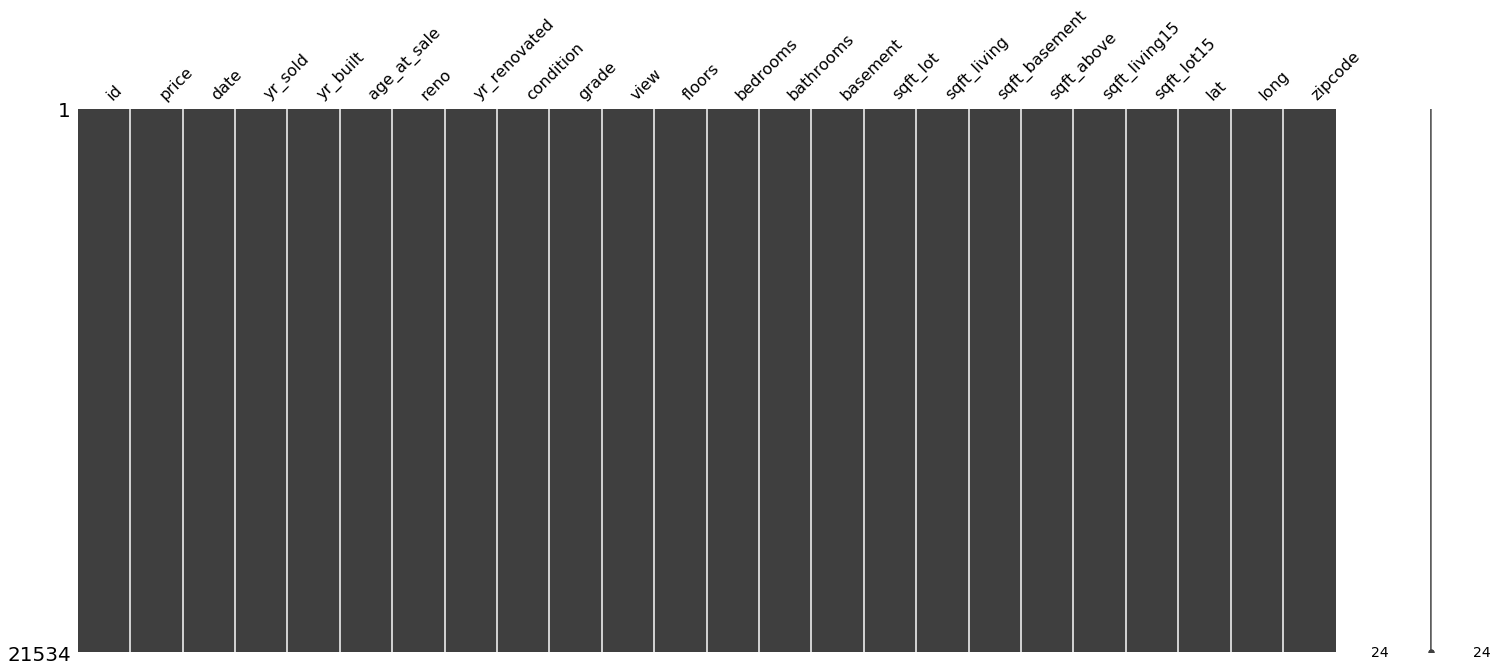

In [9]:
ms.matrix(data)

In [24]:
num_cols =data.select_dtypes('number').columns

# Require ipywidgets import interact. See notes in Import Required Libraries sections
@interact 
def show_plot1(col=num_cols):
    '''
     It calls another plot_col function. 
     This function is used in conjuction of ipwidgets.interact function. '''
    
    col_analysis(data, col)    

interactive(children=(Dropdown(description='col', options=('id', 'price', 'yr_sold', 'yr_built', 'age_at_sale'…

In [48]:
@interact
def show_plot2(col=num_cols):
    '''
     It calls another plot_col function. 
     This function is used in conjuction of ipwidgets.interact function. '''
    analysis_plot(data,col,target='price')

interactive(children=(Dropdown(description='col', options=('id', 'price', 'yr_sold', 'yr_built', 'age_at_sale'…

<function matplotlib.pyplot.show(*args, **kw)>

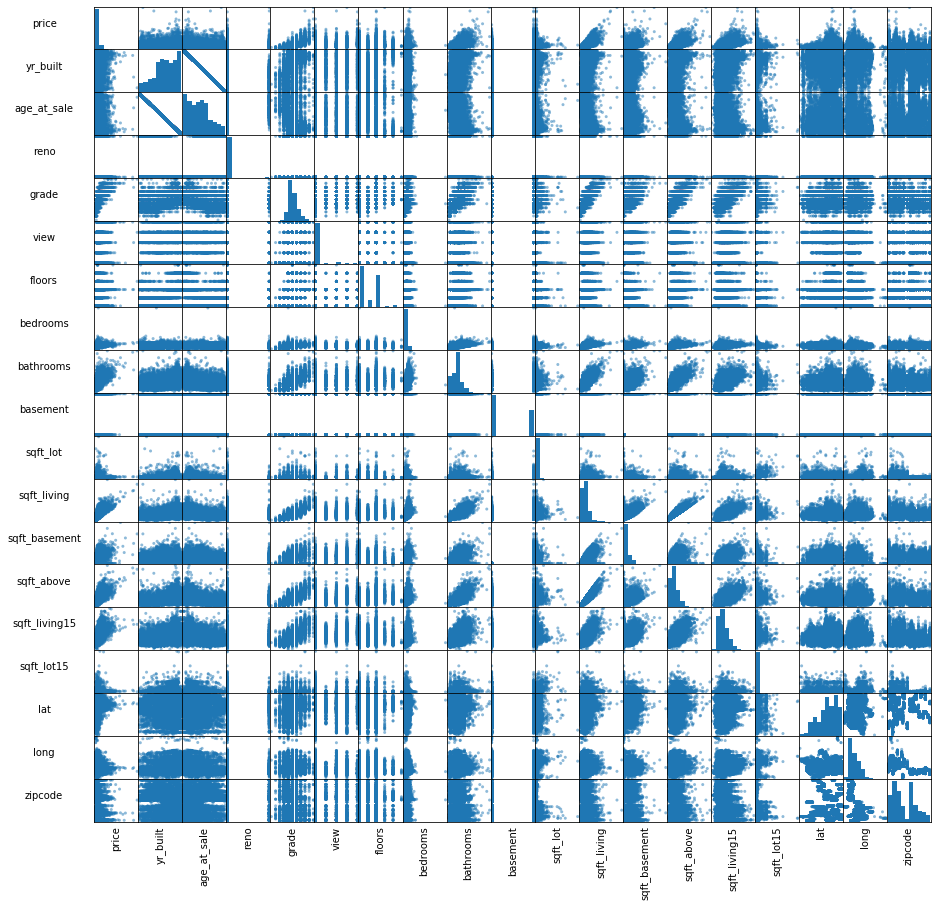

In [57]:
drop_col = ['id', 'yr_sold', 'yr_renovated', 'condition']
data_dropCols = data.drop(columns=drop_col)
plots = pd.plotting.scatter_matrix(data_dropCols, figsize=(15,15))
for subaxis in plots:
    for ax in subaxis:
        # to remove any ticks from the graph 
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
plt.show

> Outliers and normal Distribution
- **ID**: Drop.
- **date**: Date of sale
- **Price**: **Target** variable. Normal Distribution: **Yes** Outliers: **Yes**
    - Remove Outliers >3 z-score. Provide the reasoning for dropping datapoints.
- **yr_sold**: Drop. Only 2 Entries 2014 and 2015. More houses were sold in 2014 than 2015 
- **age_at_sale**: Continious variable. Ranges from -1 to 115yrs.  Normal Distribution: **Yes** Outliers: **No**
    - Investigate -1 age??. 
- **reno**: Catagorical Variable (0,1)
- **yr_renovates**: Drop. Prefered "reno"
- **condition**: Drop, Catagorical Variable. Range (1,2,3,4,5). No linear relationship 
- **grade**: Categorical variable. Range (3 to 13). 
    - Drop if no linear relation ship with Target variable.
- **view**: Categorical Variable. Range (0,1,2,3,4). 
    - Mostly 0. Hence convert to binary. 
- **floors**: Categorical Variable. Range (1,1.5,2,2.5,3,3.5). 
- **basement**: Categorical Variable. Range (0,1).
- **Bedrooms**: Catergorical. Range (1 to 33).  Outliers: **Yes**
- **Bathrooms**: Categorical. Few outliers
    - Featre engineering: New columns by Bedrooms * Bathrooms --> Bed_Bath
- **sqft_lot**: Continious Variable. Range () Normal Distribution: **Yes** Outliers: **Yes**
- **sqft_living**: Continious Variable. Range (). Normal Distribution: **Yes** Outliers: **Yes**
- **sqft_basement**: Continious Variable. Mostly 0. Normal Distribution: **Yes** Outliers: **Yes**
    - Convert to binary Catergorical 
- **sqft_above**: Continious Variable. Normal Distribution: **Yes** Outliers: **Yes**
- **sqft_living15**: Continious Variable. Normal Distribution: **Yes** Outliers: **Yes**
- **sqft_lot15**: Continious Variable. Mostly 0 Normal Distribution: **Yes** Outliers: **Yes**
    - Convert to binary Catergorical
- **lat & long**: Can be used for mapping funtion
- **zipcode**: undesided  

In [72]:
data_dropCols['date'] = pd.to_datetime(data_dropCols['date'], format="%Y-%m-%d")
data_dropCols['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21529   2014-05-21
21530   2015-02-23
21531   2014-06-23
21532   2015-01-16
21533   2014-10-15
Name: date, Length: 21534, dtype: datetime64[ns]

In [63]:
data_dropCols['bed_bath'] = data_dropCols['bedrooms']*data_dropCols['bathrooms']
data_dropCols['view_available'] = [1 if x>0 else 0 for x in data_dropCols['view']]

In [84]:
# data_dropCols.drop(columns=['bedrooms', 'bathrooms'], inplace=True)
drop_cols = ['view', 'sqft_basement', 'lat', 'long', 'zipcode', 'yr_built', 'date']

> **Quick Data observations**
- <b>Columns droped from data_dropCols</b>: ['id', 'yr_sold', 'yr_renovated', 'condition'] 
- <b>Drop columns list</b>: ['view', 'basement', 'lat', 'long', 'zipcode']. For future formulae generation
- <b>Columns unknown</b>: [sqft_living15, sqft_lot15]
- <b>Categorical Columns</b>: ['reno', 'grade','view_available', 'basement_available', 'floors', 'bed_bath']
- New Features: basement_available, bed_bath, view_available
- No Null values observed
- Price difference between lowest and highest house is 2 fold

# EXPLORE

> Explore Checklist
- [ ] No Co-linearity: 
- [ ] Outliers: Remove using Z-score
- [ ] Categorical Columns: One Hot Encoding
- [ ] Scalling

In [85]:
# Following are the columns are were already decided to be removed from the regression formula
# Reason was provided in Scrub Section
drop_cols

['view', 'sqft_basement', 'lat', 'long', 'zipcode', 'yr_built', 'date']

Columns with correlation higher than 0.75 are
                                    cc
pair                                  
(sqft_living, sqft_above)     0.876553
(bed_bath, sqft_living)       0.777507
(sqft_living, grade)          0.762398
(sqft_living, sqft_living15)  0.756208
(grade, sqft_above)           0.755977


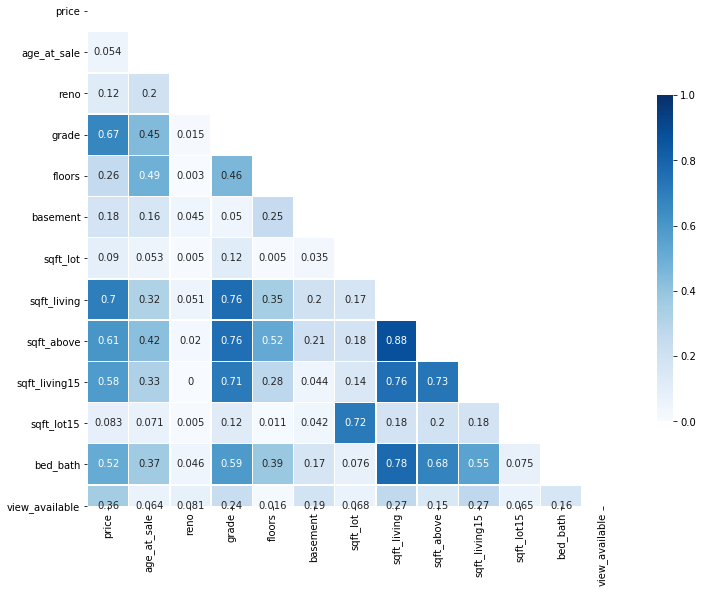

In [88]:
corr_df, high_corr_col = corr_map(data_dropCols, drop_cols, cutoff = 0.75)

In [90]:
# Columns to remove from the reggression formula are
formula_drop_cols = drop_cols + ['sqft_living15', 'sqft_lot15']
formula_drop_cols

['view',
 'sqft_basement',
 'lat',
 'long',
 'zipcode',
 'yr_built',
 'date',
 'sqft_living15',
 'sqft_lot15']

In [113]:
# remove outliers and rerun the correlation map
# outlier_df = outliers_z(data_dropCols, z_cutoff = 3)
outlier_df = np.abs(stats.zscore(data_dropCols['price']))
outlier_df = pd.DataFrame(outlier_df, index = data_dropCols.index, columns=['price'])
(outlier_df > 4).sum()

price    409
dtype: int64

In [105]:
data_Cleaned = data_dropCols[(outlier_df > 4)]

Columns with correlation higher than 0.75 are
                                 cc
pair                               
(sqft_above, sqft_living)  0.876553
(bed_bath, sqft_living)    0.777507
(grade, sqft_living)       0.762398
(sqft_above, grade)        0.755977


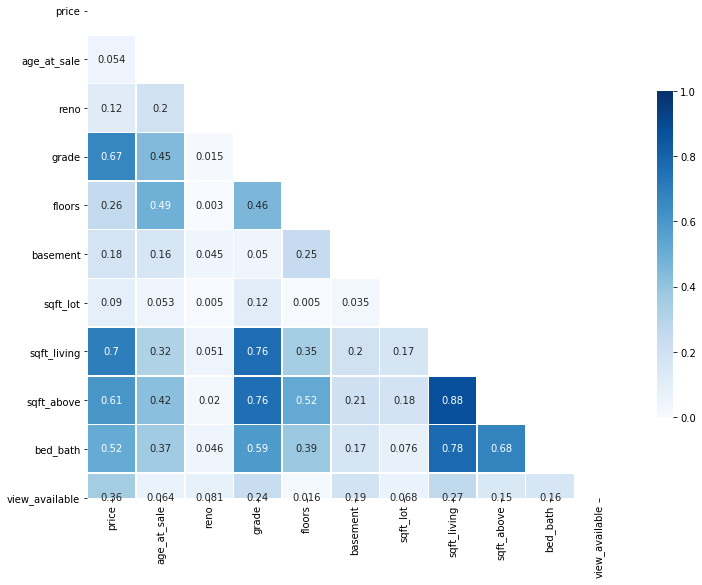

In [107]:
corr_df, high_corr_col = corr_map(data_dropCols, formula_drop_cols, cutoff = 0.75)

# MODEL

> Modeling Checklist
- [ ] High R-squaured
- [ ] Low P-values
- [ ] Homeoscedasticity

new cols: month_sold, bed_bath_ratio, average price instead or zipcode, year_reno

In [135]:
target = 'price'
formula_drop_cols.remove(target)

In [137]:
formula_drop_cols

['view',
 'sqft_basement',
 'lat',
 'long',
 'zipcode',
 'yr_built',
 'date',
 'sqft_living15',
 'sqft_lot15']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     3528.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:11:19   Log-Likelihood:            -2.9597e+05
No. Observations:               21534   AIC:                         5.920e+05
Df Residuals:                   21523   BIC:                         5.920e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.045e+06   1.51e+04    -69.021      0.000   -1.07e+06   -1.02e+06
age_at_sale     3480.4796     66.732     52.156      0.000    3349.680    3611.279
reno            4.602e+04   8719.775      5.278      0.000    2.89e+04    6.31e+04
grade           1.332e+05   2259.705     58.960      0.000    1.29e+05    1.38e+05
floors          3.574e+04   3779.508      9.455      0.000    2.83e+04    4.31e+04
basement        1.253e+04   5592.037      2.240      0.025    1566.054    2.35e+04
sqft_lot          -0.2057      0.038     -5.383      0.000      -0.281      -0.131
sqft_living      161.0162      6.691     24.065      0.000     147.902     174.131
sqft_above         1.3862      7.261      0.191      0.849     -12.845      15.617
bed_bath         685.7442    606.061      1.131      0.258    -502.181    1873.669
view_available  1.539e+05   5561.115     27.672      0.000    1.43e+05    1.65e+05
==============================================================================
Omnibus:                    17497.662   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1372035.880
Skew:                           3.391   Prob(JB):                         0.00
Kurtosis:                      41.512   Cond. No.                     4.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

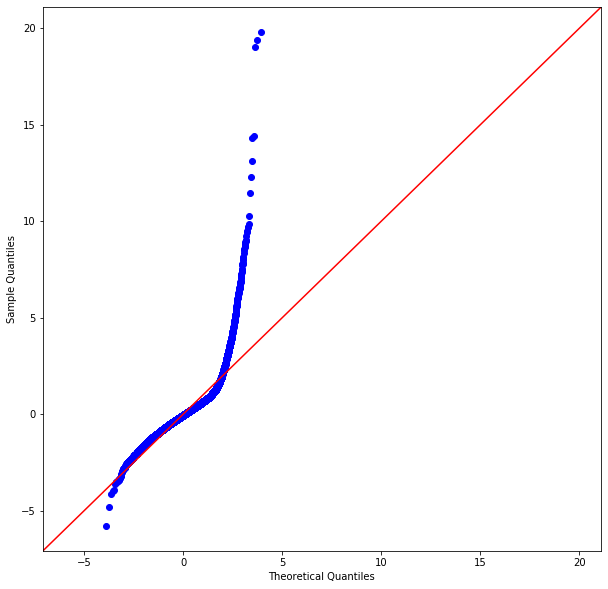

In [142]:
f_cols, model, f = multi_linear_reg(data_dropCols, formula_drop_cols, target)

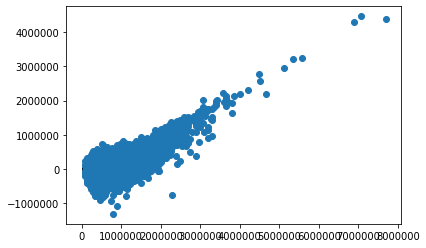

In [133]:
resids = model.resid
xs = data_dropCols[target]
plt.scatter(xs,resids)
plt.hlines(y=0, xmin=0, xmax=len(resids))
# plt.set(ylabel='Residuals',title='Homoskedasticity Check',
#               xlabel=xlabel)

Outliers in the upper range.
drop grade. since its correlated with multiple columns


# Functions

In [87]:
def corr_map(df_1, drop_cols, cutoff = 0.75):
    ''' Generates correlation mask to hide the unwanted cells from a correlation matrix. 
    required input is the df (DataFrame)'''
    df = df_1.drop(drop_cols,axis=1)
    # Set a new fig and its size
    fig, ax= plt.subplots(figsize = (12,12))
    
    # Create a corrrelation matrix for each df columns and round it to 3 sig-figs.
    corr = np.abs(df.corr().round(3))
    
    # Create a mask to hide the duplicate half of the matrix for easy comparison
    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True
    
    # create a heat map with the help of the correlation values
    sns.heatmap(corr, annot=True, square=True, mask=mask, vmin=0, cmap='Blues',
            ax=ax, linewidths=.5, cbar_kws={"shrink": .5}, cbar=True)
    
    #plt.set_ylim(len(corr),-0.5,0.5)
    
    # generate a df of correlation that are higher than the cutoff value
    df_corr=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df_corr = df_corr[~(df_corr['level_0'] == df_corr['level_1'])]
    df_corr['pair'] = list(zip(df_corr['level_0'], df_corr['level_1']))
    df_corr.drop(columns = ['level_0','level_1'], inplace=True)
    df_corr.set_index('pair', drop=True, inplace=True)
    df_corr.drop_duplicates(inplace=True)
    df_corr.columns = ['cc']
    print('Columns with correlation higher than {} are'.format(cutoff))
    high_corr = df_corr[df_corr['cc']>cutoff]
    print(high_corr)
    return df_corr, high_corr

In [141]:
def multi_linear_reg (df, drop_cols, target):
    ''' Generate a multilinear model from a DataFrame and without the drop_cols. 
    
    @params:
    df is a pd.DataFrame
    drop_cols is a list of columns to not include in the model fit
    target is the str() of our predicted columns name.
    
    @Output:
    generated linear model
    Columns used to generate the model
    Model summary
    QQ-plot for our residuals to test for normality of residual spread
    Plot to check for Homoscadasticity
    
    '''
    # generate the string of pridictor columns used in formulae
    drop_cols.append(target)
    cols = df.drop(drop_cols,axis=1).columns
    str_cols = ' + '.join(cols)
    str_cols
    
    # join our taget with our predictors str
    f = str(target)+'~'+str_cols
    
    #generate our linear model
    model = smf.ols(f,df).fit()
    display(model.summary())
    
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
    
    # Checking normality of our residule errors
    resids = model.resid
    sm.graphics.qqplot(resids,stats.norm,line='45',fit=True, ax=axes)
    
    
    # Checking for the Homoscadasticity
    
#     xs = df[target]
#     plt.plot(xs,resids, ax= axes[1])
#     axes[1].hlines(y=0, xmin=0, xmax=len(resids))
    
#     ax[1].set(ylabel='Residuals',title='Homoskedasticity Check',
#               xlabel=xlabel)
    
    return cols, model, f

In [28]:
def multi_scatterplot(df, cols, target, kind='scatter'):
    '''
     Plot scatter plots for each col against a target column.
     
     '''
    if len(col)%4 == 0:
        fig, axes = plt.subplots(nrows=len(cols)//4, ncols=4, figsize =(10,10))
        for col, ax in zip(cols, axes):
            df.plot(kind=kind, x=col, y=target, ax=ax, alpha=0.4, color='b')
    else:
        fig, axes = plt.subplots(nrows=(len(cols)//4)+1, ncols=len(cols)/2, figsize =(10,10))
        for col, ax in zip(cols, axes):
            df.plot(kind=kind, x=col, y=target, ax=ax, alpha=0.4, color='b')

In [29]:
def catagorical(df, value_range = (1,10)):
    '''
     Retrun an numpy array of catagorical columns from a dataframs.
     Criteria from the catagorical values is based on number of unique values.
     
     Input: 
     df : pandas.DataFrame()
     
     value_range (default = (1,10)) : Lower and upper range to filter in the the number of unique value per column.
                  The values are exclusive.
     '''
    
    cols_unique_value = df.nunique().sort_values()
    cat_cols = (cols_unique_value[(cols_unique_value>value_range[0]) & 
                                  (cols_unique_value<value_range[1])]).index
    return np.array(cat_cols)

In [30]:
def one_hot_endcoding(df, catagoricals):
    '''
     Create one_hot_encoded columns from the catagorical columns list.
     Retruns: a df_ohe
     '''
    
    df1 = df[catagoricals].astype('category')
    preprocessing = pd.get_dummies(df1[catagoricals], prefix=catagoricals, 
                                   drop_first=True)
    df1.drop(columns=catagoricals, inplace=True)

    df_ohe = pd.concat([df1, preprocessing], axis=1)
    return df_ohe

In [53]:
def analysis_plot(df,col,target='SalePrice'):
    '''
     Plots a joint plot against our target column. with hist/kde on the perimeter. 
     
    Inputs are independent variable (col), dependent variable (Target).
    output will be the graph. '''

    
    # Joint graph is a with scatter and hist on axis
    sns.jointplot(data=df,x=col,y=target,kind='reg') #, ax=axes2[0])
    plt.title(f"{col} vs {target}", pad=1.5)
    

In [32]:
def outliers_z(df, z_cutoff = 3):
    z_calc = np.abs(stats.zscore(df, axis=1))
    z_calc = pd.DataFrame(z_calc, index = df.index,columns=df.columns)
    outliers = z_calc > z_cutoff
    return outliers

In [33]:
def col_analysis(df, col):
    ''' Creates a 2 graphs to analyze the distribution of each factor
     Graph Right: Histogram to analyze the data distribution normal vs non-normal.
     Graph Left: Box plot to analyze outliers.'''
    fig ,axes = plt.subplots(ncols=2, figsize = (12,8)) #, title = (f'{col} vs {target}'),ylabel=target)
    
    # Graph Right: Box plot
    sns.boxplot(y = col, data=df, ax= axes[1])
    
    # Graph Left: Histogram
    sns.distplot(df[col],ax=axes[0])